
🔁 Predicting: Radius

Model: LinearRegression
🧮 MAE: 0.54


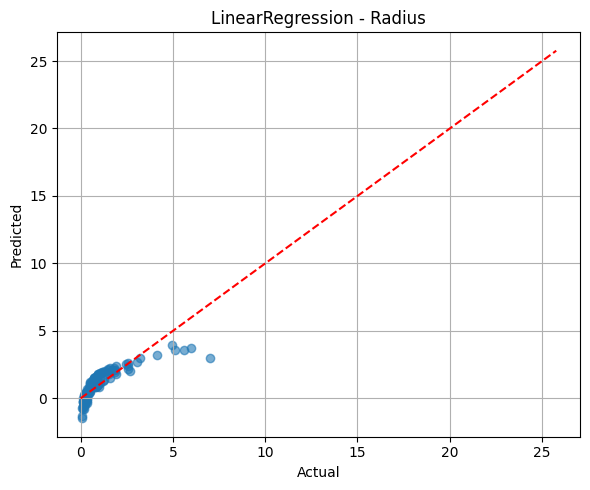


Model: RandomForestRegressor
🧮 MAE: 0.01


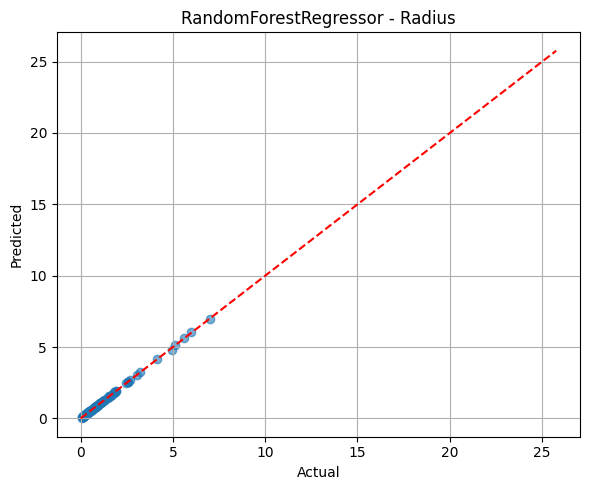


Model: KNNRegressor
🧮 MAE: 0.06


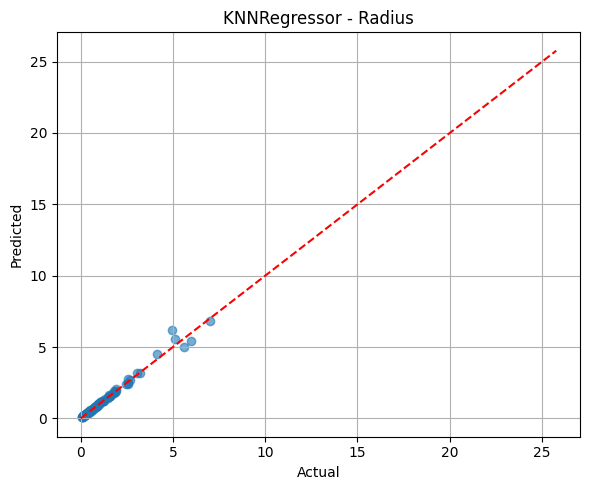


🔁 Predicting: Temperature

Model: LinearRegression
🧮 MAE: 1329.45


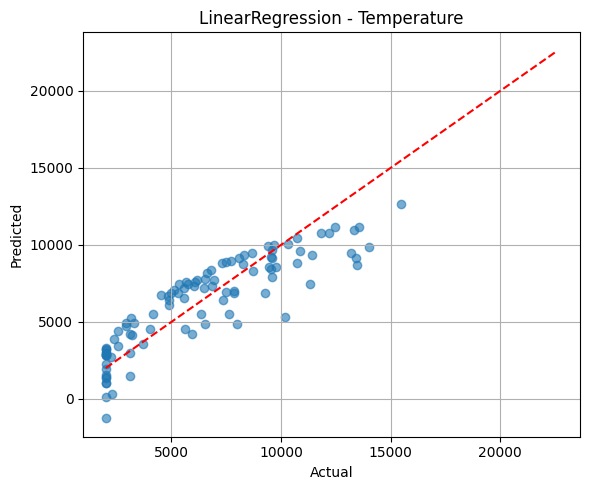


Model: RandomForestRegressor
🧮 MAE: 14.89


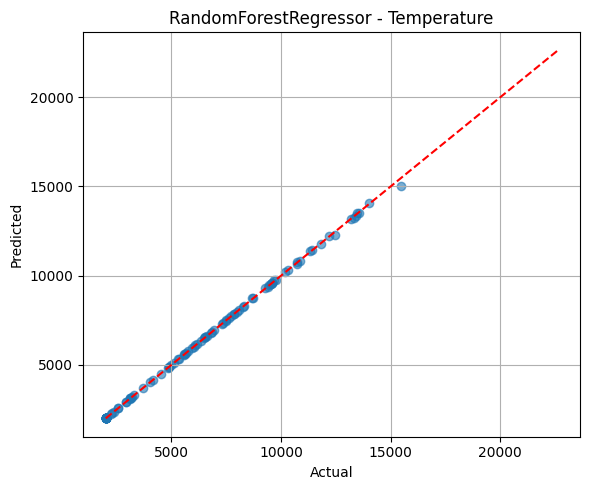


Model: KNNRegressor
🧮 MAE: 154.63


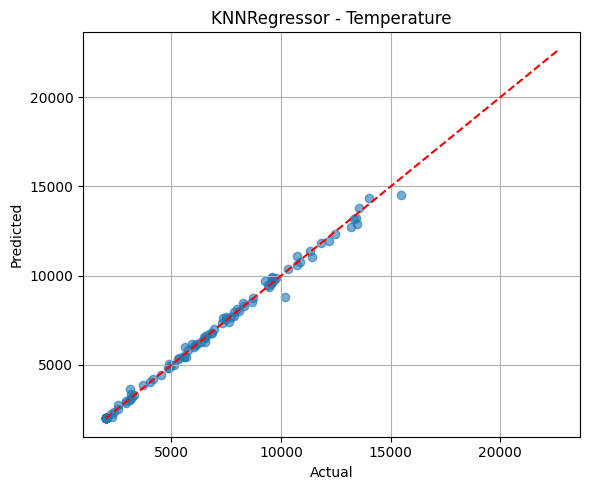


🔁 Predicting: Luminosity

Model: LinearRegression
🧮 MAE: 49.55


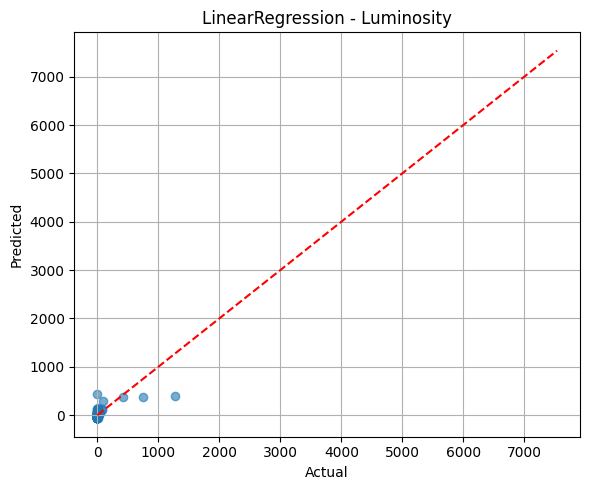


Model: RandomForestRegressor
🧮 MAE: 0.06


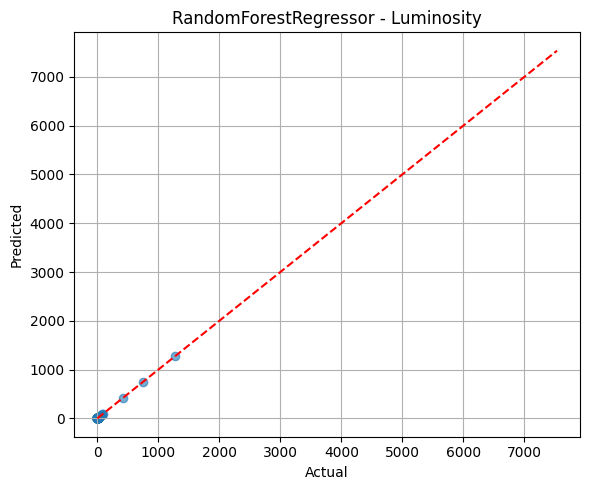


Model: KNNRegressor
🧮 MAE: 2.84


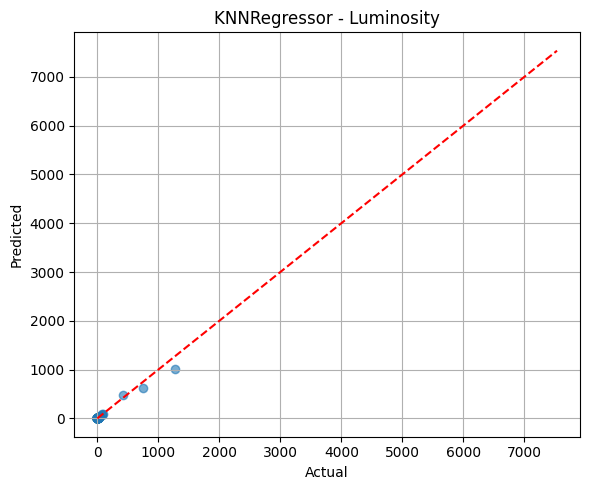


🔁 Predicting: Absolute_Magnitude

Model: LinearRegression
🧮 MAE: 1.16


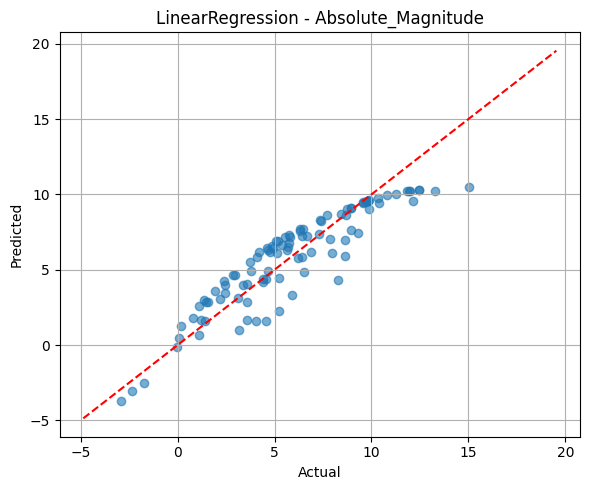


Model: RandomForestRegressor
🧮 MAE: 0.00


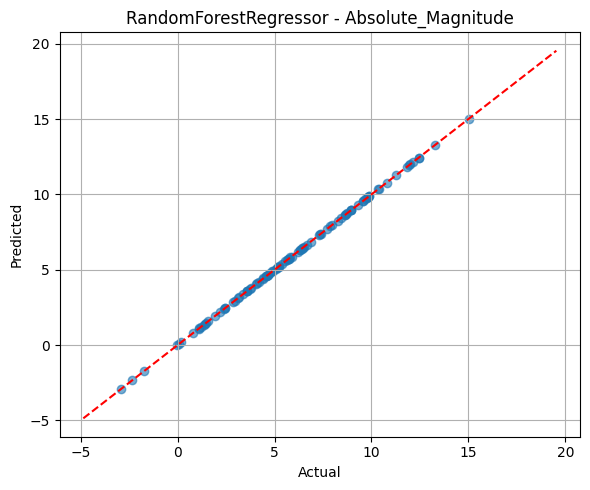


Model: KNNRegressor
🧮 MAE: 0.12


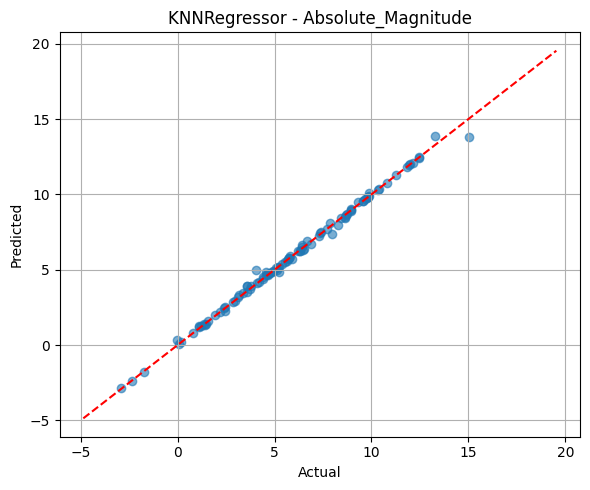


🔁 Predicting: Star_Color

Model: LogisticRegression
✅ Accuracy: 0.17


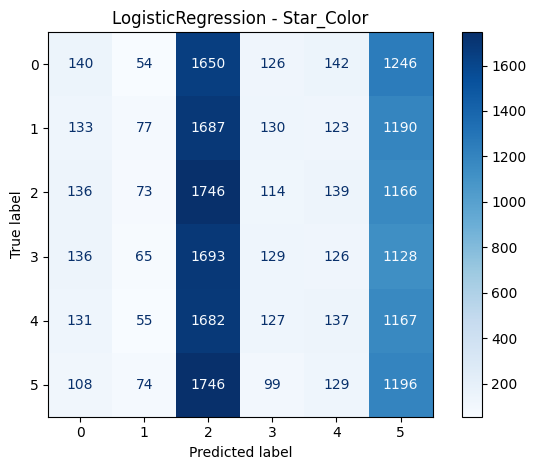


Model: RandomForestClassifier
✅ Accuracy: 0.17


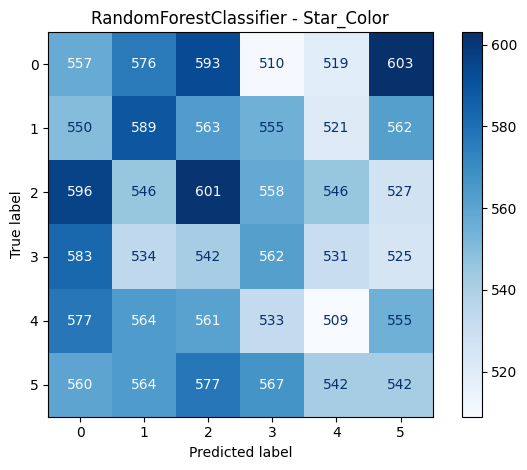


Model: KNNClassifier
✅ Accuracy: 0.17


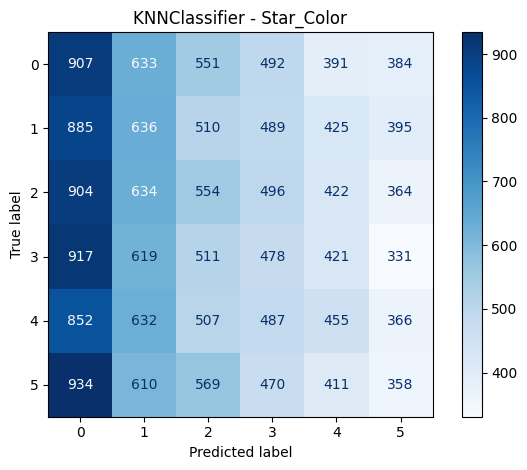


🔁 Predicting: Spectral_Class

Model: LogisticRegression
✅ Accuracy: 0.30


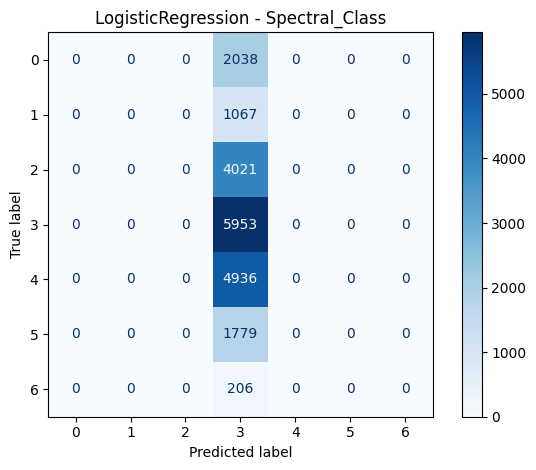


Model: RandomForestClassifier
✅ Accuracy: 0.24


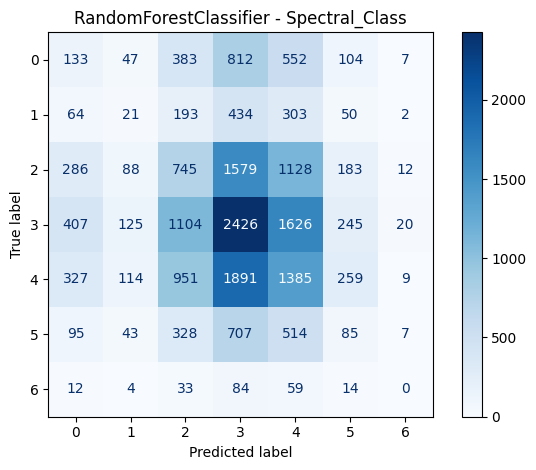


Model: KNNClassifier
✅ Accuracy: 0.23


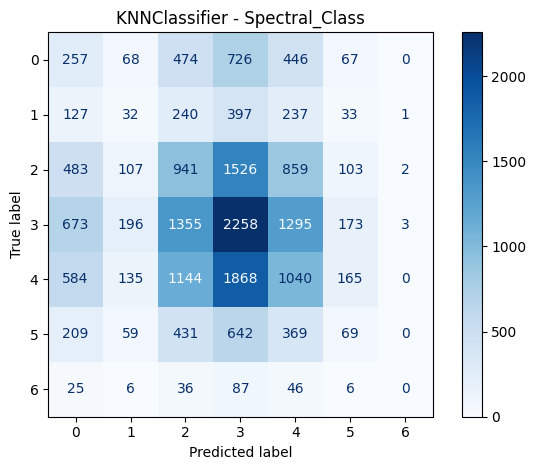


🔁 Predicting: Star_Type

Model: LogisticRegression
✅ Accuracy: 0.17


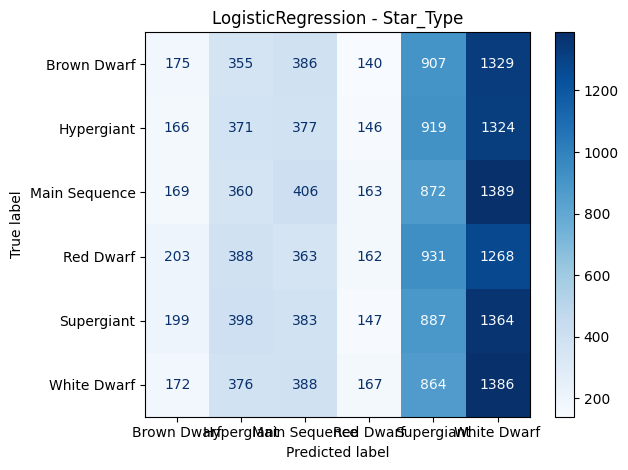


Model: RandomForestClassifier
✅ Accuracy: 0.17


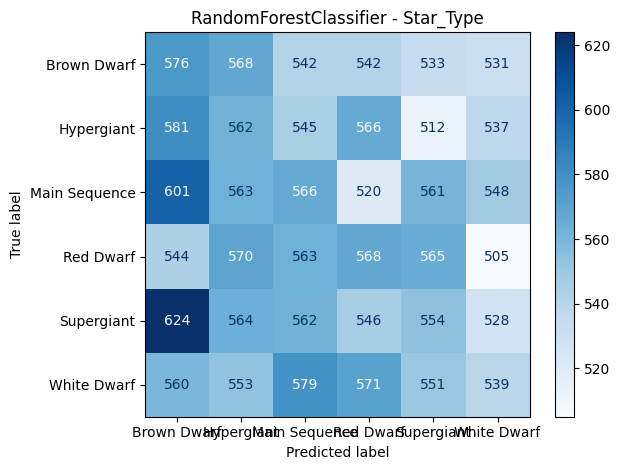


Model: KNNClassifier
✅ Accuracy: 0.17


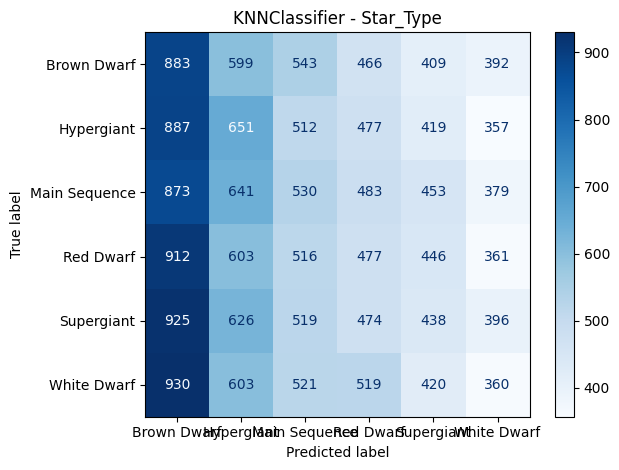

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Load Data
df = pd.read_csv("data/star_data.csv")

# Label encode "Star Color" and "Spectral Class"
le_color = LabelEncoder()
le_spec = LabelEncoder()
df["Star_Color"] = le_color.fit_transform(df["Star_Color"])
df["Spectral_Class"] = le_spec.fit_transform(df["Spectral_Class"])

# Feature Types
feature_types = {
    "Temperature": "reg",
    "Luminosity": "reg",
    "Radius": "reg",
    "Absolute_Magnitude": "reg",
    "Star_Color": "clf",
    "Spectral_Class": "clf",
    "Star_Type": "clf"
}

# Algorithms to try
regressors = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(),
    "KNNRegressor": KNeighborsRegressor()
}

classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForestClassifier": RandomForestClassifier(),
    "KNNClassifier": KNeighborsClassifier()
}

# Run loop for all target features
for target in df.columns:
    print(f"\n🔁 Predicting: {target}")
    
    # Prepare data
    X = df.drop(columns=[target])
    y = df[target]

    num_cols = X.select_dtypes(include='number').columns.tolist()
    cat_cols = []  # all inputs are numeric now after label encoding, so keep empty

    # Preprocessor
    preprocessor = ColumnTransformer([
        ("num", StandardScaler(), num_cols),
        # No categorical encoding needed right now
    ])

    is_regression = feature_types[target] == "reg"
    algorithms = regressors if is_regression else classifiers

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    for model_name, model in algorithms.items():
        pipe = Pipeline([
            ("pre", preprocessor),
            ("model", model)
        ])

        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)

        print(f"\nModel: {model_name}")
        
        if is_regression:
            mae = mean_absolute_error(y_test, y_pred)
            print(f"🧮 MAE: {mae:.2f}")
            # Plot
            plt.figure(figsize=(6,5))
            plt.scatter(y_test[:100], y_pred[:100], alpha=0.6)
            plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
            plt.xlabel("Actual")
            plt.ylabel("Predicted")
            plt.title(f"{model_name} - {target}")
            plt.tight_layout()
            plt.grid(True)
            plt.show()
        else:
            acc = accuracy_score(y_test, y_pred)
            print(f"✅ Accuracy: {acc:.2f}")
            ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
            plt.title(f"{model_name} - {target}")
            plt.tight_layout()
            plt.show()


In [2]:
plt.scatter(df)

TypeError: scatter() missing 1 required positional argument: 'y'